# **Preprocesamiento de datos.**
El preprocesamiento de datos es una etapa fundamental en la construcción de cualquier modelo de predicción. En este notebook, aplicaremos técnicas para **limpiar, transformar y preparar el dataset** antes de su uso en el modelado.

Dado que en el análisis exploratorio del notebook anterior, identificamos la presencia de **valores nulos, datos duplicados, variables categóricas y valores atípicos**, en esta fase nos enfocaremos en:
- **Manejo de valores nulos** mediante eliminación o imputación.
- **Eliminación de duplicados** para evitar sesgos en el modelo.
- **Conversión y corrección de tipos de datos** para garantizar coherencia.
- **Transformación y codificación de variables categóricas** para su uso en modelos predictivos.
- **Estandarización o normalización de variables numéricas**, si es necesario.

Al finalizar este proceso, guardaremos un **dataset limpio en `data/processed/`**, que servirá como insumo en la siguiente fase de modelado.

## Importación de librerías.

In [245]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## Importación e información de Dataframes.

In [246]:
df = pd.read_csv('../data/raw/IA_PROPENSITY_TRAIN.csv', index_col=0)
df.head()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,Campanna1,Campanna2,Campanna3,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,,,
CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,SI,NO,NO,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,NO,NO,NO,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0
CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,Lerida,NO,NO,NO,Medio,NO DATA,No,NO,1376,0,True,4,21,3
CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,Madrid,SI,NO,NO,Medio,SI,Averia muy grave,SI,2015,7256,True,4,48,5
CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,Santa Cruz de Tenerife,SI,NO,SI,Alto,NO DATA,No,NO,1818,0,True,3,21,3


In [247]:
df.shape

(58049, 23)

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58049 entries, CLI1 to CLI58048
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PRODUCTO         58049 non-null  object
 1   TIPO_CARROCERIA  58049 non-null  object
 2   COMBUSTIBLE      58049 non-null  object
 3   Potencia         58049 non-null  object
 4   TRANS            58049 non-null  object
 5   FORMA_PAGO       58049 non-null  object
 6   ESTADO_CIVIL     57159 non-null  object
 7   GENERO           57189 non-null  object
 8   OcupaciOn        58049 non-null  object
 9   PROVINCIA        58049 non-null  object
 10  Campanna1        58049 non-null  object
 11  Campanna2        58049 non-null  object
 12  Campanna3        58049 non-null  object
 13  Zona_Renta       44871 non-null  object
 14  REV_Garantia     58049 non-null  object
 15  Averia_grave     58048 non-null  object
 16  QUEJA_CAC        58049 non-null  object
 17  COSTE_VENTA      58049 non-nul

In [249]:
df.columns

Index(['PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'Potencia', 'TRANS', 'FORMA_PAGO', 'ESTADO_CIVIL', 'GENERO', 'OcupaciOn', 'PROVINCIA', 'Campanna1', 'Campanna2', 'Campanna3', 'Zona_Renta', 'REV_Garantia', 'Averia_grave', 'QUEJA_CAC', 'COSTE_VENTA', 'km_anno', 'Mas_1_coche', 'Revisiones', 'Edad_Cliente', 'Tiempo'], dtype='object')

A continuación se describen las variables incluidas en el dataset, utilizadas para el análisis de propensión de compra de vehículos.
- **Code.** Código único que identifica a cada cliente.
- **Producto.** Modelo o tipo de coche adquirido por el cliente.
- **Tipo de Carroceria.** Tipo de carrocería del vehículo (SUV, sedán, coupé, etc.).
- **Combustible.** Tipo de combustible utilizado por el vehículo (diésel, gasolina, eléctrico, híbrido).
- **Potencia.** Potencia del motor del coche (puede estar en CV o kW).
- **Trans.** Tipo de transmisión del coche (manual, automática).
- **Forma de Pago.** Método de pago del cliente (financiado o contado).
- **Estado Civil.** Estado civil del cliente (soltero, casado, divorciado, etc.).
- **Género.** Género del cliente (masculino, femenino).
- **Ocupación.** Profesión o sector de trabajo del cliente.
- **Provincia.** Ubicación geográfica del cliente.
- **Campanna1.** Historial de participación del cliente en la primera campaña de marketing.
- **Campanna2.** Historial de participación del cliente en la segunda campaña de marketing.
- **Campanna3.** Historial de participación del cliente en la tercera campaña de marketing.
- **Zona Renta.** Clasificación de la zona de residencia del cliente según nivel de renta.
- **REV Garantia.** Indica si el vehículo ha recibido revisiones dentro del período de garantía.
- **Averia Grave.** Indica si el coche ha tenido alguna avería grave registrada.
- **Queja CAC.** Indica si el cliente ha presentado quejas al servicio de atención al cliente.
- **Coste Venta.** Precio final del coche después de aplicar descuentos.
- **KM Año.** Promedio de kilómetros recorridos por año por el cliente.
- **Más de 1 Coche.** Variable objetivo (1 si el cliente ha comprado más de un coche, 0 si no).
- **Revisiones.** Número de revisiones del coche en concesionarios oficiales.
- **Edad Cliente.** Edad actual del cliente en años.
- **Tiempo.** Tiempo en años transcurridos entre la primera y la última compra del cliente.

In [250]:
df.head(3)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,Campanna1,Campanna2,Campanna3,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,,,
CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,SI,NO,NO,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,NO,NO,NO,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0
CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,Lerida,NO,NO,NO,Medio,NO DATA,No,NO,1376,0,True,4,21,3


## Limpieza de datos.
Antes de construir un modelo de predicción, es fundamental asegurarnos de que los datos sean consistentes, completos y libres de errores. En esta sección, abordaremos la gestión de valores nulos y duplicados, dos problemas comunes en los datasets que pueden afectar el rendimiento del modelo y la calidad del análisis.

### Manejo de filas duplicadas.
Los datos duplicados pueden sesgar los resultados y generar inconsistencias en el análisis. Aquí revisaremos si existen registros repetidos en el dataset y aplicaremos las estrategias necesarias para eliminarlos sin perder información relevante.

In [251]:
df.duplicated().sum() # Columnas duplicadas

np.int64(144)

In [252]:
df.drop_duplicates(inplace = True)

In [253]:
df.shape[0] # Filas tras eliminar duplicados

57905

### Manejo de filas nulas.
Los valores nulos pueden generar problemas en los modelos predictivos, especialmente si afectan variables clave. En este análisis, identificaremos las columnas con datos faltantes y aplicaremos estrategias como eliminación o imputación, dependiendo del impacto que puedan tener en el modelo.

In [254]:
df.isnull().sum() # Valores nulos

PRODUCTO               0
TIPO_CARROCERIA        0
COMBUSTIBLE            0
Potencia               0
TRANS                  0
FORMA_PAGO             0
ESTADO_CIVIL         890
GENERO               860
OcupaciOn              0
PROVINCIA              0
Campanna1              0
Campanna2              0
Campanna3              0
Zona_Renta         13064
REV_Garantia           0
Averia_grave           1
QUEJA_CAC              0
COSTE_VENTA            0
km_anno                0
Mas_1_coche            0
Revisiones             0
Edad_Cliente           0
Tiempo                 0
dtype: int64

In [255]:
null_percentage = (df.isnull().sum() / len(df)) * 100 # Porcentaje de valores nulos
null_percentage[null_percentage > 0]

ESTADO_CIVIL     1.537000
GENERO           1.485191
Zona_Renta      22.561091
Averia_grave     0.001727
dtype: float64

El modelo de propensión tiene como objetivo **predecir qué clientes tienen más probabilidades de comprar más de un coche**, optimizando estrategias de marketing y ventas en la industria automotriz​. Para ello, es fundamental procesar correctamente los valores nulos en el dataset.
- **Estado Civil.** El estado civil puede influir en la decisión de compra, ya que clientes casados o con familias podrían tener una mayor necesidad de adquirir más de un vehículo. Mantener esta variable en el modelo permite analizar si existe una tendencia en la compra de múltiples coches según el estado civil. En este caso, se recomienda **rellenar los valores nulos con la moda**.
- **Género.** La segmentación por género podría revelar diferencias en el comportamiento de compra. Es posible que ciertos perfiles sean más propensos a la recompra. Se aplicará lo anterior para rellenar los valores nulos: **rellenar con la moda**.
- **Zona Renta.** La zona de residencia de un cliente puede estar vinculada a su capacidad adquisitiva y, por lo tanto, a su propensión a comprar más de un coche.
- **Averia Grave.** El porcentaje de nulos es insignificante, por lo que eliminarlas no afectará la calidad del dataset.

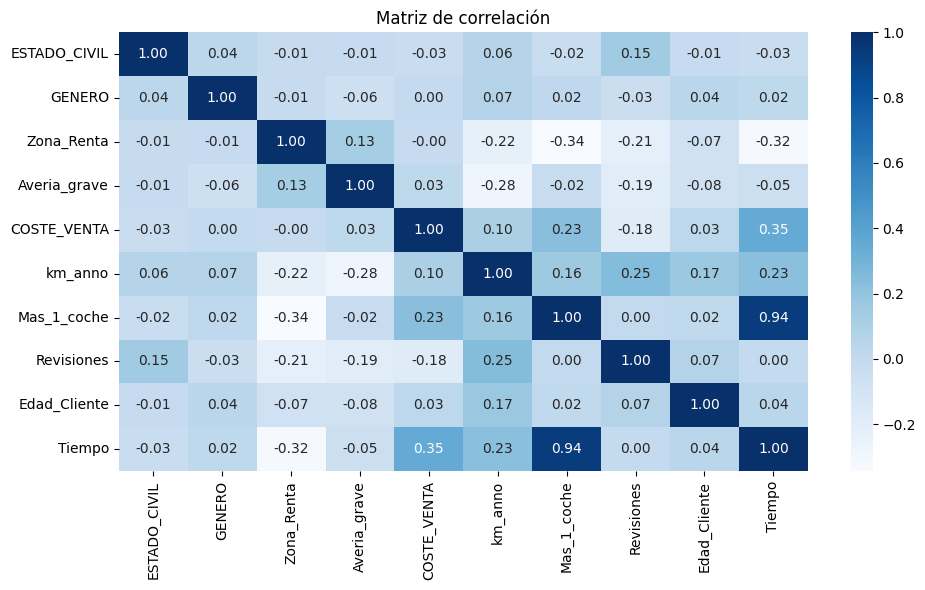


In [256]:
df.dropna(subset=['Averia_grave'], inplace=True)

In [257]:
for col in ["ESTADO_CIVIL", "GENERO", "Zona_Renta"]:
    df[col] = df[col].fillna(df[col].mode()[0])

### **Selección de variables categóricas y continuas.**
Para realizar correctamente un ánalisis de datos debemos de distinguir entre las variables categóricas, variables que representan diferentes categorías o grupos, y continuas, variables que pueden tomar cualquier valor dentro de un rango determinado.

In [258]:
v_continuas = []
v_categoricas = []
for i in df.columns:
    if df[i].nunique() > 55 or df[i].dtypes in ['float64', 'int64']:
        v_continuas.append(i)
    else:
        v_categoricas.append(i)

print('Variables continuas: {}'.format(', '.join(v_continuas)))
print('Variables categóricas: {}'.format(', '.join(v_categoricas)))

Variables continuas: COSTE_VENTA, km_anno, Revisiones, Edad_Cliente, Tiempo
Variables categóricas: PRODUCTO, TIPO_CARROCERIA, COMBUSTIBLE, Potencia, TRANS, FORMA_PAGO, ESTADO_CIVIL, GENERO, OcupaciOn, PROVINCIA, Campanna1, Campanna2, Campanna3, Zona_Renta, REV_Garantia, Averia_grave, QUEJA_CAC, Mas_1_coche


#### **Tratamiento de variables categóricas.**
Para el posterior modelo de clasificación, necesitamos codificar nuestras variables. Para ello, realizaremos una codificación ordinal que consiste en asignar valores enteros a las categorias basándose en su posición o jerarquía en los datos.

In [259]:
df[v_categoricas].head(3)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,Campanna1,Campanna2,Campanna3,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,Mas_1_coche
CODE,,,,,,,,,,,,,,,,,,
CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,SI,NO,NO,Medio-Bajo,NO DATA,Averia muy grave,SI,False
CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,NO,NO,NO,Medio-Bajo,SI,No,NO,False
CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,Lerida,NO,NO,NO,Medio,NO DATA,No,NO,True


In [260]:
df[v_categoricas].nunique()

PRODUCTO           11
TIPO_CARROCERIA     8
COMBUSTIBLE         2
Potencia            3
TRANS               2
FORMA_PAGO          4
ESTADO_CIVIL        4
GENERO              2
OcupaciOn           3
PROVINCIA          53
Campanna1           2
Campanna2           2
Campanna3           2
Zona_Renta          4
REV_Garantia        2
Averia_grave        4
QUEJA_CAC           2
Mas_1_coche         2
dtype: int64

In [261]:
df[v_categoricas].describe()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,Campanna1,Campanna2,Campanna3,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,Mas_1_coche
count,57904,57904,57904,57904,57904,57904,57904,57904,57904,57904,57904,57904,57904,57904,57904,57904,57904,57904
unique,11,8,2,3,2,4,4,2,3,53,2,2,2,4,2,4,2,2
top,B,TIPO1,FUEL 2,Media,M,Contado,CASADO,M,Empresa,Madrid,NO,NO,NO,Alto,NO DATA,No,NO,False
freq,15982,23359,33012,39807,52830,30147,44284,40913,53118,10809,37348,50968,51019,30204,31867,29796,36128,40977


Antes de proceder con la codificación de las variables categóricas, es fundamental realizar una revisión de los valores únicos presentes en cada una de ellas. Este paso nos permite identificar posibles inconsistencias en los datos, como errores de escritura, diferencias en el formato o valores no esperados, que podrían afectar la calidad del modelo.

Al analizar los valores únicos, podremos detectar y corregir errores, agrupar categorías similares si es necesario y definir la estrategia de codificación más adecuada. Una vez verificada la coherencia de los datos, aplicaremos **OrdinalEncoder** o **LabelEncoder** según corresponda, asegurando que las variables estén en el formato adecuado para su uso en el modelo predictivo.

In [262]:
print('Valores únicos de las variables categóricas:')
for col in v_categoricas:
    print(f"- {col}: {df[col].unique()}")

Valores únicos de las variables categóricas:
- PRODUCTO: ['A' 'B' 'C' 'H' 'J' 'D' 'I' 'E' 'F' 'K' 'G']
- TIPO_CARROCERIA: ['TIPO1' 'TIPO6' 'TIPO4' 'TIPO7' 'TIPO8' 'TIPO2' 'TIPO3' 'TIPO5']
- COMBUSTIBLE: ['FUEL 1' 'FUEL 2']
- Potencia: ['Baja' 'Media' 'Alta']
- TRANS: ['M' 'A']
- FORMA_PAGO: ['Contado' 'Otros' 'Financiera Marca' 'Financiera Banco']
- ESTADO_CIVIL: ['CASADO' 'SOLTERO' 'OTROS' 'EN PAREJA']
- GENERO: ['M' 'F']
- OcupaciOn: ['Empresa' 'Funcionario' 'Autonomo']
- PROVINCIA: ['Asturias' 'Toledo' 'Lerida' 'Madrid' 'Santa Cruz de Tenerife'
 'Pontevedra' 'Lacoruna' 'Barcelona' 'Cordoba' 'Guipuzcua' 'Valladolid'
 'Castellon' 'Valencia' 'Las Palmas' 'La Rioja' 'Baleares' 'Zaragoza'
 'Alicante' 'Tarragona' 'Leon' 'Lugo' 'Badajoz' 'Vizcaya' 'Sevilla'
 'Guadalajara' 'Ciudad Real' 'Cantabria' 'Orense' 'Navarra' 'Gerona'
 'Malaga' 'Jaen' 'Murcia' 'Burgos' 'Granada' 'Alava' 'Cuenca' 'Cadiz'
 'Salamanca' 'Albacete' 'Almeria' 'Teruel' 'Segovia' 'Palencia' 'Huelva'
 'Huesca' 'Zamora' 'Avil

Para convertir las variables categóricas en un formato numérico adecuado, se aplicarán distintas estrategias de codificación según su naturaleza:
- Se utilizará **OrdinalEncoder** en las variables que presentan un **orden lógico** en sus categorías:
    - **Potencia:** Baja < Media < Alta.
    - **Zona_Renta:** Medio-Bajo < Medio < Alto < Otros.
    - **Averia_grave:** No < Averia leve < Averia grave < Averia muy grave.
- Para el resto de las variables categóricas, que no tienen un orden inherente, se aplicará **LabelEncoder**, asegurando que cada categoría sea representada por un valor numérico sin introducir una jerarquía artificial.

##### **Variables con Orden Lógico (`OrdinalEncoder`).**
Las siguientes variables tienen un orden lógico en sus categorías, por lo que utilizaremos **OrdinalEncoder** para mantener la relación jerárquica entre ellas. Se asignan valores numéricos respetando el orden jerárquico de las categorías.

In [263]:
# Definición del orden lógico de las variables ordinales.
ordinal_cols = {
    "Potencia": ["Baja", "Media", "Alta"],
    "Zona_Renta": ["Otros", "Medio-Bajo", "Medio", "Alto"],
    "Averia_grave": ["No", "Averia leve", "Averia grave", "Averia muy grave"]
}

In [264]:
ordinal_encoder = OrdinalEncoder(categories=[ordinal_cols[col] for col in ordinal_cols])
df[list(ordinal_cols.keys())] = ordinal_encoder.fit_transform(df[list(ordinal_cols.keys())])

##### **Variables sin Orden Específico (`LabelEncoder`).**
Las siguientes variables son categóricas nominales, es decir, no presentan una relación jerárquica entre sus categorías. Para estas, utilizaremos **LabelEncoder**, que asignará un valor numérico arbitrario a cada categoría.

In [265]:
# Variables categóricas a codificar (solo restan las nominales)
label_cols = [col for col in v_categoricas if df[col].dtype != "float64"]

for i in label_cols: # Codificación de las variables categóricas nominales
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

#### **Tratamiento de variables continuas.**
El preprocesamiento de variables continuas es una etapa clave para mejorar la calidad del modelo y garantizar que las características numéricas aporten información relevante. En este apartado, hemos abordado distintas técnicas para optimizar estas variables y reducir posibles sesgos en el análisis.

In [266]:
df[v_continuas].head(3)

,COSTE_VENTA,km_anno,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,
CLI1,2892,0,2,18,0
CLI2,1376,7187,2,53,0
CLI3,1376,0,4,21,3


In [267]:
df[v_continuas].describe()

,COSTE_VENTA,km_anno,Revisiones,Edad_Cliente,Tiempo
count,57904.000000,57904.000000,57904.000000,57904.000000,57904.000000
mean,2540.657416,11832.042847,3.535559,47.362255,1.862497
std,1605.129977,10201.406504,2.527840,11.225932,3.093356
min,0.000000,0.000000,0.000000,18.000000,0.000000
25%,1595.000000,0.000000,1.000000,40.000000,0.000000
50%,2353.000000,11505.000000,3.000000,48.000000,0.000000
75%,3309.000000,17938.000000,5.000000,56.000000,4.000000
max,18455.000000,182331.000000,13.000000,71.000000,14.000000


##### **Valores atípicos.**
Los valores atípicos pueden afectar la estabilidad del modelo, distorsionar las predicciones y generar ruido en el análisis. Para detectarlos, utilizamos **boxplots** y aplicamos el método del **rango intercuartil (IQR)**, que nos permite identificar datos extremos en función de su dispersión.

En este análisis, consideramos valores atípicos aquellos que se encuentran **fuera del rango definido entre el percentil 10 (`Q1`) y el percentil 90 (`Q3`)**, ajustando los límites para adaptarnos mejor a la distribución de los datos. Posteriormente, evaluaremos distintas estrategias para su tratamiento. Los resultados obtenidos a través de los **boxplots confirman las conclusiones del EDA**.

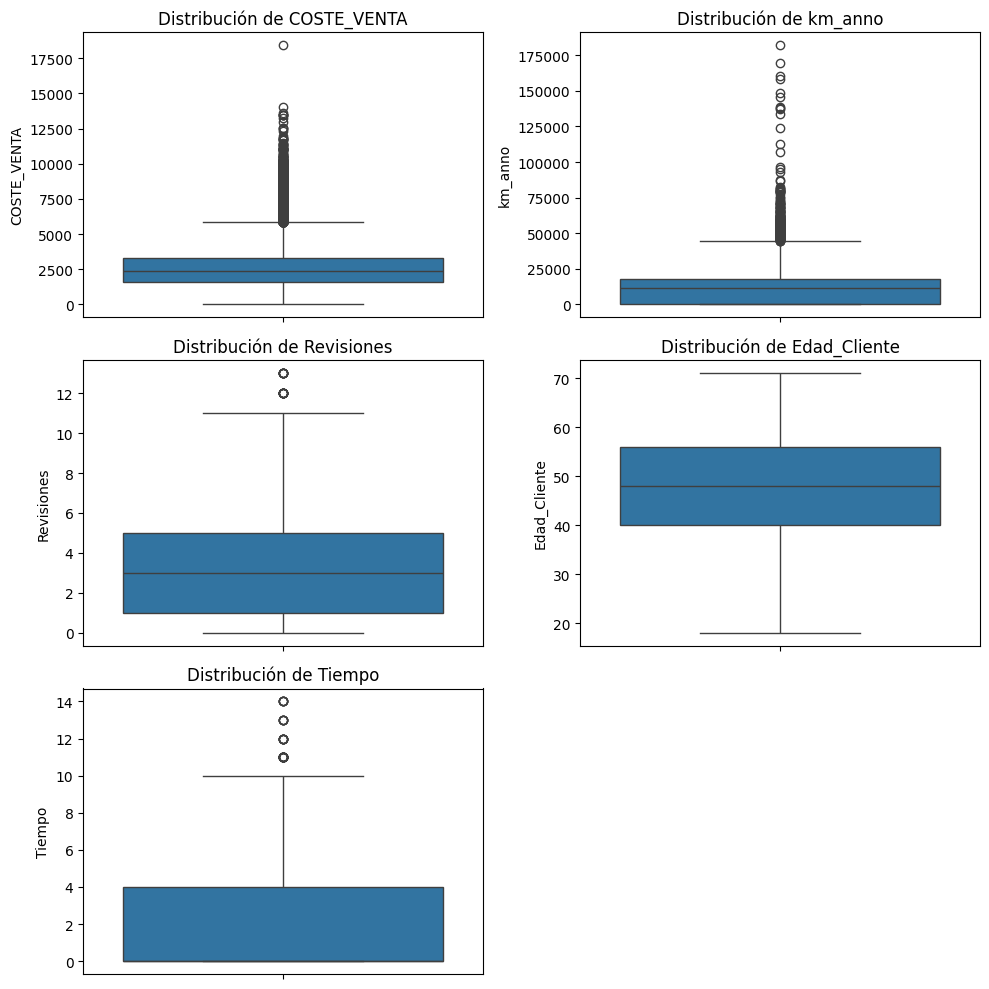

In [268]:
def outliers_IQR(df, cols):
    outliers = {}
    for col in cols:
        Q1 = df[col].quantile(0.10)
        Q3 = df[col].quantile(0.90)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Contar valores atípicos
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
        # Eliminar outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df, outliers

In [269]:
df, outliers_detectados = outliers_IQR(df, v_continuas)
print("Valores atípicos detectados:")
for col, count in outliers_detectados.items():
    print(f"- {col}: {count}")

Valores atípicos detectados:
- COSTE_VENTA: 37
- km_anno: 66
- Revisiones: 0
- Edad_Cliente: 0
- Tiempo: 0


In [ ]:
df.shape[0] # Filas tras eliminar outliers.

57801

## **Exportación del Dataset Final.**
Tras completar el preprocesamiento de los datos, es necesario guardar el dataset limpio y transformado para su uso en el modelo de clasificación. En esta etapa, aseguramos que todas las variables estén correctamente codificadas, sin valores nulos ni atípicos, y listas para ser utilizadas en el entrenamiento del modelo. Exportaremos el dataset en **formato CSV** para facilitar su integración con los algoritmos de clasificación, asegurando que los datos sean accesibles de manera eficiente en futuras etapas del análisis.

In [274]:
df.to_csv('../data/processed/IA_PROPENSITY_TRAIN_v1.csv', index=False)